## Автоматизированные информационно-управляющие системы

### Лекция 2. Прикладное построение графиков, диаграмм и данных

<hr>

### Версия Python

In [1]:
!python --version

Python 3.8.3


<hr>

### Импорт необходимых инструментов

In [2]:
import numpy as np               # Научные вычисления
import pandas as pd              # Обработка и анализ данных
import matplotlib as mpl         # Визуализация графиков
import matplotlib.pyplot as plt  # MATLAB-подобный способ построения графиков
import seaborn as sns            # Визуализация графиков (надстройка над matplotlib)
import urllib.request            # Работа с URL
import json                      # Кодирование и декодирование данные в удобном формате
import xmltodict                 # Преобразование XML документа в словарь
import requests                  # Отправка HTTP запросов
import os                        # Работа с файловой системой
import matplotlib.image as mpimg # Работа с изображениями

from pandas.api.types import CategoricalDtype # Категориальные данные
from datetime import datetime  # Работа со временем

from matplotlib.legend_handler import HandlerBase # Работа с легендой
from matplotlib.ticker import MaxNLocator # Работа с метками
from matplotlib.text import Text # Работа с текстом на графике
from skimage import transform # Трансформации изображений

### Настройки необходимых инструментов

In [3]:
pd.set_option('display.max_columns', None) # Максимальное количество отображаемых столбцов
pd.set_option('display.max_rows', None)    # Максимальное количество отображаемых строк

### Версии необходимых библиотек

In [4]:
pkgs = {
    'Package': [
        'NumPy', 'Pandas', 'Matplotlib', 'Seaborn', 'Json', 'Xmltodict'],
    'Version': [i.__version__ for i in [np, pd, mpl, sns, json, xmltodict]]}

df_pkgs = pd.DataFrame(data = pkgs)   # Версии используемых библиотек
df_pkgs.head(None).style.hide_index() # Отображение первых N строк или все если указать None

Package,Version
NumPy,1.18.5
Pandas,1.0.5
Matplotlib,3.2.2
Seaborn,0.10.1
Json,2.0.9
Xmltodict,0.12.0


<hr>

### Формирование каталога товаров

- `ID_product` - ID товара
- `ID_department` - ID категории
- `Department_eng` - категория на английском
- `Department_rus` - категория на русском
- `Product_eng` - товар на английском
- `Product_rus` - товар на русском

In [5]:
# Путь к товарам
path = 'https://raw.githubusercontent.com/DmitryRyumin/Automated_Data_Processing_and_Control_Systems/master/XML/Dictionary.xml'

# Считывание каталога товаров
with urllib.request.urlopen(path) as fd:
    catalog = json.loads(json.dumps(xmltodict.parse(fd.read().decode('utf-8'))))

print(catalog)

{'store': {'department': [{'@name_eng': 'Clothing', '@name_rus': 'Одежда', 'product': [{'@id': '1', '@name_eng': 'Shirt', '@name_rus': 'Рубашка'}, {'@id': '2', '@name_eng': 'Pants', '@name_rus': 'Брюки'}]}, {'@name_eng': 'Shoes', '@name_rus': 'Обувь', 'product': [{'@id': '101', '@name_eng': 'Sneakers', '@name_rus': 'Кеды'}, {'@id': '102', '@name_eng': 'Womens_shoes', '@name_rus': 'Туфли'}]}]}}


In [6]:
catalog['store']['department']

[{'@name_eng': 'Clothing',
  '@name_rus': 'Одежда',
  'product': [{'@id': '1', '@name_eng': 'Shirt', '@name_rus': 'Рубашка'},
   {'@id': '2', '@name_eng': 'Pants', '@name_rus': 'Брюки'}]},
 {'@name_eng': 'Shoes',
  '@name_rus': 'Обувь',
  'product': [{'@id': '101', '@name_eng': 'Sneakers', '@name_rus': 'Кеды'},
   {'@id': '102', '@name_eng': 'Womens_shoes', '@name_rus': 'Туфли'}]}]

In [7]:
# Табличное представление
catalog = pd.DataFrame.from_dict(catalog['store']['department'])

catalog

,@name_eng,@name_rus,product
0,Clothing,Одежда,"[{'@id': '1', '@name_eng': 'Shirt', '@name_rus..."
1,Shoes,Обувь,"[{'@id': '101', '@name_eng': 'Sneakers', '@nam..."


In [8]:
# Парсинг товаров
for e in ['@id', '@name_eng', '@name_rus']:
    catalog['product_' + e[1:]] = catalog['product'].apply(lambda x: x[e] if type(x) is dict else [v[e] for v in x])

catalog

,@name_eng,@name_rus,product,product_id,product_name_eng,product_name_rus
0,Clothing,Одежда,"[{'@id': '1', '@name_eng': 'Shirt', '@name_rus...","[1, 2]","[Shirt, Pants]","[Рубашка, Брюки]"
1,Shoes,Обувь,"[{'@id': '101', '@name_eng': 'Sneakers', '@nam...","[101, 102]","[Sneakers, Womens_shoes]","[Кеды, Туфли]"


In [9]:
# Удаление не нужного столбца, которого распарсили
catalog.drop(['product'], axis = 1, inplace = True)

catalog

,@name_eng,@name_rus,product_id,product_name_eng,product_name_rus
0,Clothing,Одежда,"[1, 2]","[Shirt, Pants]","[Рубашка, Брюки]"
1,Shoes,Обувь,"[101, 102]","[Sneakers, Womens_shoes]","[Кеды, Туфли]"


In [10]:
# Преобразование списков в строки
catalog = catalog.set_index(['@name_eng', '@name_rus']).apply(lambda x: x.apply(pd.Series).stack()).reset_index().drop('level_2', 1)

catalog

,@name_eng,@name_rus,product_id,product_name_eng,product_name_rus
0,Clothing,Одежда,1,Shirt,Рубашка
1,Clothing,Одежда,2,Pants,Брюки
2,Shoes,Обувь,101,Sneakers,Кеды
3,Shoes,Обувь,102,Womens_shoes,Туфли


In [11]:
# Переименование названий столбцов
catalog.rename(
    columns = {
        '@name_eng': 'Department_eng',
        '@name_rus': 'Department_rus',
        'product_id': 'ID_product',
        'product_name_eng': 'Product_eng',
        'product_name_rus': 'Product_rus'
    },
    inplace = True
)

catalog

,Department_eng,Department_rus,ID_product,Product_eng,Product_rus
0,Clothing,Одежда,1,Shirt,Рубашка
1,Clothing,Одежда,2,Pants,Брюки
2,Shoes,Обувь,101,Sneakers,Кеды
3,Shoes,Обувь,102,Womens_shoes,Туфли


In [12]:
# Добавление ID каждой категории
catalog['ID_department'] = catalog['Department_eng'].astype('category').cat.codes + 1

catalog

,Department_eng,Department_rus,ID_product,Product_eng,Product_rus,ID_department
0,Clothing,Одежда,1,Shirt,Рубашка,1
1,Clothing,Одежда,2,Pants,Брюки,1
2,Shoes,Обувь,101,Sneakers,Кеды,2
3,Shoes,Обувь,102,Womens_shoes,Туфли,2


In [13]:
# Сортировка столбцов
capitalizу = ['ID_department', 'Department_eng', 'Department_rus', 'ID_product', 'Product_eng', 'Product_rus']

catalog = catalog[capitalizу] # Изменение позиции столбцов

catalog

,ID_department,Department_eng,Department_rus,ID_product,Product_eng,Product_rus
0,1,Clothing,Одежда,1,Shirt,Рубашка
1,1,Clothing,Одежда,2,Pants,Брюки
2,2,Shoes,Обувь,101,Sneakers,Кеды
3,2,Shoes,Обувь,102,Womens_shoes,Туфли


In [14]:
#. Установка индексов
catalog.set_index('ID_product', inplace = True)
catalog.index = catalog.index.map(str)

catalog.head(20)

,ID_department,Department_eng,Department_rus,Product_eng,Product_rus
ID_product,,,,,
1,1,Clothing,Одежда,Shirt,Рубашка
2,1,Clothing,Одежда,Pants,Брюки
101,2,Shoes,Обувь,Sneakers,Кеды
102,2,Shoes,Обувь,Womens_shoes,Туфли


In [15]:
catalog.to_csv(
    r'/Users/dl/GitHub/Automated_Data_Processing_and_Control_Systems/CSV/NEW.csv', index = True, header = True
)

### Визуализация каталога товаров

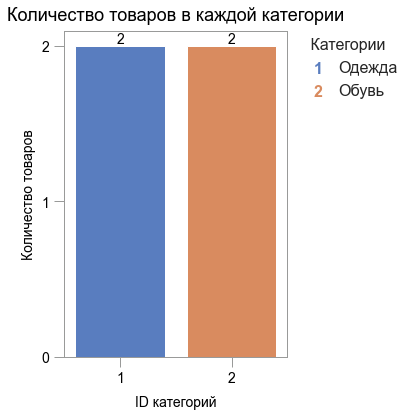

In [16]:
# Базовый класс легенды
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup, xdescent, ydescent, width, height, fontsize, trans):
        tx = Text(
            width / 1.3,
            height / 4,
            tup[0],
            fontsize = fontsize,
            ha = 'center',
            va = 'center',
            color = tup[1],
            fontweight = 'bold'
        )
        
        return [tx]

def _countplot(df, pad):
    """
    График подсчета количества элементов

    (pandas.core.frame.DataFrame, int) -> None

    Аргументы:
        df - Данные
        pad - Отступ от ряда до его значения

    Возвращает: None
    """

    # Создание новой фигуры
    plt.figure(
        figsize = (4, 6) # Размер фигуры в дюймах
    )
    
    # Установка эстетических параметров
    sns.set(
        style = 'white', # Стиль
        palette = 'muted', # Пальтра
        color_codes = True,
        rc = {'lines.linewidth': 2.7}
    )
    sns.despine(left = True)
    mpl.rcParams['axes.linewidth'] = 1 # Толщина рамки

    ax = plt.axes() # Добавление осей к текущей фигуре
    ax.xaxis.tick_bottom() # Перемещение меток в нижнюю часть

    # Количество элементов в каждом классе
    ax = sns.countplot(df.ID_department, label = 'Количество')
    
    counts = df.groupby(df.ID_department).Department_eng.count().index.tolist()

    for i, p in enumerate(ax.patches):
        height = p.get_height()

        ax.text(
            p.get_x() + p.get_width() / 2.0, # X позиция размещения текста
            height + pad, # Y позиция размещения текста
            df.ID_department.value_counts()[counts[i]], # Текст
            ha = 'center', # Выравнивание
            fontdict = {
                'fontsize': 14, # Размер заголовка
                'color': '#000000' # Цвет заголовка
            },
        )

    # Изменение внешнего вида меток
    ax.tick_params(
        axis = 'x', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#999A99', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        bottom = True,  # Рисование линий меток
    )
    ax.tick_params(
        axis = 'y', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#999A99', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        left = True  # Рисование линий меток
    )

    # Заголовок осей
    ax.set_title(
        label = 'Количество товаров в каждой категории', # Заголовок
        fontdict = {
            'fontsize': 18, # Размер заголовка
            'color': '#000000' # Цвет заголовка
        },
        pad = 10 # Отступ заголовка от вершины осей
    )

    # Изменение внешнего вида меток данных
    ax.set_xlabel(
        'ID категорий',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 10 # Отступ

    )
    ax.set_ylabel(
        'Количество товаров',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 5 # Отступ
    )
    
    plt.setp(ax.spines.values(), color = '#999A99') # Цвет рамки
    
    ax.yaxis.set_major_locator(MaxNLocator(integer = True))

    xticklabels = ax.get_xticklabels() # Метки X
    
    # Словарь из ID и названий категорий
    labels = dict(zip(df.ID_department, df.Department_rus))
    
    labels = [labels[int(h.get_text())]  for h in xticklabels]
    handles = [(h.get_text(), c.get_fc()) for h, c in zip(xticklabels, ax.patches)]
    
    ax.legend(
        handles,
        labels,
        handler_map = {tuple : TextHandler()},
        bbox_to_anchor = (1., 1),
        borderaxespad = 0,
        frameon = False,
        fontsize = 16,
        title = ' Категории',
        title_fontsize = 16
    )
    
    plt.show() # Отображение фигуры

_countplot(catalog, 0.015)

### Массовая загрузка данных из Google Images

> 1. Найти необходимые изображения в Google Images (при необходимости сделать скроллинг страницы)
> 2. Открыть консоль браузера и выполнить код:
>
>     ```js
>     // Имитация щелчка правой кнопкой мыши на изображении, которое отображается в браузере
>     function simulateRightClick(element) {
>         var event1 = new MouseEvent('mousedown', {
>             bubbles: true, cancelable: false, view: window, button: 2, buttons: 2,
>             clientX: element.getBoundingClientRect().x,
>             clientY: element.getBoundingClientRect().y
>         });
>         element.dispatchEvent(event1);
>         var event2 = new MouseEvent('mouseup', {
>             bubbles: true, cancelable: false, view: window, button: 2, buttons: 0,
>             clientX: element.getBoundingClientRect().x,
>             clientY: element.getBoundingClientRect().y
>         });
>         element.dispatchEvent(event2);
>         var event3 = new MouseEvent('contextmenu', {
>             bubbles: true, cancelable: false,
>             view: window, button: 2, buttons: 0,
>             clientX: element.getBoundingClientRect().x,
>             clientY: element.getBoundingClientRect().y
>         });
>         element.dispatchEvent(event3);
>     }
>     
>     // Извлечение URL
>     function getURLParam(queryString, key) {
>         var vars = queryString.replace(/^\?/, '').split('&');
>         for (let i = 0; i < vars.length; i++) {
>             let pair = vars[i].split('=');
>             if (pair[0] == key) { return pair[1]; }
>         }
>         return false;
>     }
>     
>     // Сбор всех URL в текстовый файл
>     function createDownload(contents) {
>         var hiddenElement = document.createElement('a');
>         hiddenElement.href = 'data:attachment/text,' + encodeURI(contents);
>         hiddenElement.target = '_blank'; hiddenElement.download = 'urls.txt'; hiddenElement.click();
>     }
>     
>     // Захват всех URL
>     function grabUrls() {
>         var urls = [];
>         return new Promise(function (resolve, reject) {
>             var count = document.querySelectorAll('.isv-r a:first-of-type').length, index = 0;
>             Array.prototype.forEach.call(document.querySelectorAll(
>                 '.isv-r a:first-of-type'), function (element) {
>                     simulateRightClick(element.querySelector(':scope img'));
>                     var interval = setInterval(function () {
>                         if (element.href.trim() !== '') {
>                             clearInterval(interval);
>                             let googleUrl = element.href.replace(/.*(\?)/, '$1'),
>                                 fullImageUrl = decodeURIComponent(getURLParam(googleUrl, 'imgurl'));
>                             if (fullImageUrl !== 'false') { urls.push(fullImageUrl); }
>                             index++;
>                             if (index == (count - 1)) { resolve(urls); }
>                         }
>                     }, 10);
>                 });
>         });
>     }
>     
>     // Старт загрузки
>     grabUrls().then(function (urls) { urls = urls.join('\n'); createDownload(urls); });
>     ```

In [17]:
# Типы изображений
image_types = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')


def list_images(basePath, contains = None):
    return list_files(basePath, validExts = image_types, contains = contains)


def list_files(basePath, validExts = None, contains = None):
    for (rootDir, dirNames, filenames) in os.walk(basePath):
        for filename in filenames:
            if contains is not None and filename.find(contains) == -1:
                continue

            ext = filename[filename.rfind('.'):].lower()

            if validExts is None or ext.endswith(validExts):
                imagePath = os.path.join(rootDir, filename)
                yield imagePath

In [23]:
urls = '/Users/dl/GitHub/Automated_Data_Processing_and_Control_Systems/URL/Womens_shoes.txt'
dir_output = '/Users/dl/GitHub/Automated_Data_Processing_and_Control_Systems/Store/Womens_shoes'

def download(urls, dir_output):
    # ------------------------------------------------------------------------------------------------------------------

    green = '\033[92m'  # Зеленый
    red = '\033[91m'  # Красный
    bold = '\033[1m'  # Жирный
    end = '\033[0m'  # Выход

    format_time = '%Y-%m-%d %H:%M:%S'  # Формат времени

    # ------------------------------------------------------------------------------------------------------------------

    # Файл не найден
    if os.path.isfile(urls) is False:
        print('[{}{}{}] Файл "{}" не найден ...'.format(
            red, datetime.now().strftime(format_time), end, os.path.basename(urls)
        ))
        return False

    _, ext = os.path.splitext(urls)  # Расширение файла

    if ext.replace('.', '') != 'txt':
        print('[{}{}{}] Расширение файла должно быть "{}" ...'.format(
            red, datetime.now().strftime(format_time), end, 'txt'
        ))
        return False

    if os.stat(urls).st_size == 0:
        print('[{}{}{}] Файл "{}" пуст ...'.format(
            red, datetime.now().strftime(format_time), end, os.path.basename(urls)
        ))
        return False

    # Создание директории, куда будут сохранены изображения, если она не существует
    if not os.path.exists(dir_output):
        os.makedirs(dir_output)

    # ------------------------------------------------------------------------------------------------------------------

    # Список URL-адресов из входного текстового файла
    urls = open(urls).read().strip().split('\n')

    # Проход по всем url
    for i, url in enumerate(urls):
        i += 1

        try:
            req = requests.get(url, timeout = 10)  # Отправка запроса GET

            # Сохранение изображения в указанную директорию
            path = os.path.sep.join([dir_output, '{}.jpg'.format(str(i).zfill(8))])

            with open(path, 'wb') as file:
                file.write(req.content)
        except:
            pass

    # ------------------------------------------------------------------------------------------------------------------

    all_download_files = 0  # Общее количество загруженных изображений

    # Проверка скачанных файлов
    for imagePath in list_images(dir_output):
        delete = False  # По умолчанию файл не должен быть удален

        try:
            image = mpl.pyplot.imread(imagePath)  # Попытка чтения изображения

            # Удаление файла если он не прочитан
            if image is None:
                delete = True
            else:
                all_download_files += 1
        except:
            delete = True

        # Удаление файла
        if delete:
            print('[{}{}{}] Ошибка при чтении "{}" ... удаление ...'.format(
                red, datetime.now().strftime(format_time), end, os.path.basename(imagePath)
            ))
            os.remove(imagePath)

    print('[{}{}{}] Всего файлов загружено: {}{}{} ...'.format(
        green, datetime.now().strftime(format_time), end, bold, all_download_files, end
    ))

In [206]:
res = download(urls, dir_output)

[2020-09-28 17:05:24] Ошибка при чтении "00000007.jpg" ... удаление ...
[2020-09-28 17:05:24] Ошибка при чтении "00000079.jpg" ... удаление ...
[2020-09-28 17:05:25] Ошибка при чтении "00000032.jpg" ... удаление ...
[2020-09-28 17:05:25] Всего файлов загружено: 93 ...


<hr>

### Каталоги набора данных

In [18]:
base_dir = '/Users/dl/GitHub/Automated_Data_Processing_and_Control_Systems/Store/' # Директория с БД

department = ['Pants', 'Shirt', 'Sneakers', 'Womens_shoes'] # Названия категорий

### Пример имен файлов

In [19]:
list_of_files = {} # Словарь для DataFrame

# Проход по всем категориям
for curr in department:
    # Формирование словаря для DataFrame
    list_of_files[curr] = os.listdir(os.path.join(base_dir, curr))

# Отображение в DataFrame
df_files = pd.DataFrame.from_dict(data = list_of_files, orient = 'index').transpose()
df_files[:10].head(None) # Отображение первых N строк или все если указать None

,Pants,Shirt,Sneakers,Womens_shoes
0,00000158.jpg,00000158.jpg,00000366.jpg,00000038.jpg
1,00000164.jpg,00000170.jpg,00000372.jpg,00000010.jpg
2,00000038.jpg,00000010.jpg,00000399.jpg,00000004.jpg
3,00000010.jpg,00000004.jpg,00000158.jpg,00000005.jpg
4,00000004.jpg,00000212.jpg,00000164.jpg,00000011.jpg
5,00000212.jpg,00000206.jpg,00000170.jpg,00000039.jpg
6,00000206.jpg,00000207.jpg,00000038.jpg,00000013.jpg
7,00000207.jpg,00000213.jpg,00000010.jpg,00000012.jpg
8,00000213.jpg,00000005.jpg,00000004.jpg,00000006.jpg
9,00000005.jpg,00000011.jpg,00000212.jpg,00000002.jpg


In [20]:
dict_dep = {'Pants' : 0, 'Shirt' : 1, 'Sneakers' : 2, 'Womens_shoes': 3}

dict_dep = pd.DataFrame.from_dict(dict_dep, orient = 'index', columns = ['ID'])
dict_dep.head(None) # Отображение первых N строк или все если указать None

,ID
Pants,0
Shirt,1
Sneakers,2
Womens_shoes,3


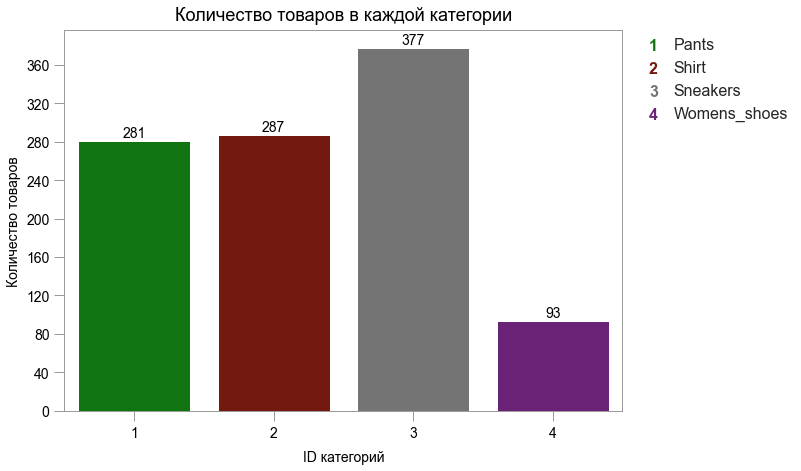

In [21]:
# Базовый класс легенды
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup, xdescent, ydescent, width, height, fontsize, trans):
        tx = Text(
            width / 1.3,
            height / 4,
            tup[0],
            fontsize = fontsize,
            ha = 'center',
            va = 'center',
            color = tup[1],
            fontweight = 'bold'
        )
        
        return [tx]

def _countplot(df, pad):
    """
    График подсчета количества элементов

    (pandas.core.frame.DataFrame, int) -> None

    Аргументы:
        df - Данные
        pad - Отступ от ряда до его значения

    Возвращает: None
    """

    # Создание новой фигуры
    plt.figure(
        figsize = (10, 7) # Размер фигуры в дюймах
    )

    # Установка эстетических параметров
    sns.set(
        style = 'white', # Стиль
        palette = 'muted', # Пальтра
        color_codes = True,
        rc = {'lines.linewidth': 2.7}
    )
    sns.despine(left = True)
    mpl.rcParams['axes.linewidth'] = 1 # Толщина рамки
    
    ax = plt.axes() # Добавление осей к текущей фигуре
    ax.xaxis.tick_bottom() # Перемещение меток в нижнюю часть

    # Количество элементов в каждом классе
    ax = sns.countplot(df.ID, label = 'Количество', palette = ['#008400', '#840B00', '#757474', '#741484'])
    
    counts = df.groupby(df.ID).variable.count().index.tolist()
    
    for i, p in enumerate(ax.patches):
        height = p.get_height()

        ax.text(
            p.get_x() + p.get_width() / 2.0, # X позиция размещения текста
            height + pad, # Y позиция размещения текста
            df.ID.value_counts()[counts[i]], # Текст
            ha = 'center', # Выравнивание
            fontdict = {
                'fontsize': 14, # Размер заголовка
                'color': '#000000' # Цвет заголовка
            },
        )

    # Изменение внешнего вида меток
    ax.tick_params(
        axis = 'x', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#999A99', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        bottom = True,  # Рисование линий меток
    )
    ax.tick_params(
        axis = 'y', # Ось
        direction = 'out', # Расположение линий меток
        length = 10, # Длина линий меток
        width = 1, # Ширина линий меток 
        color = '#999A99', # Цвет линий меток
        pad = 5, # Расстояние между линиями меток и метками
        labelsize = 14, # Размер метки
        labelcolor = '#000000', # Цвет метки
        left = True  # Рисование линий меток
    )

    # Заголовок осей
    ax.set_title(
        label = 'Количество товаров в каждой категории', # Заголовок
        fontdict = {
            'fontsize': 18, # Размер заголовка
            'color': '#000000' # Цвет заголовка
        },
        pad = 10 # Отступ заголовка от вершины осей
    )

    # Изменение внешнего вида меток данных
    ax.set_xlabel(
        'ID категорий',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 10 # Отступ

    )
    ax.set_ylabel(
        'Количество товаров',
        fontsize = 14, # Размер метки
        fontdict = {
            'color': '#000000' # Цвет метки
        },
        labelpad = 5 # Отступ
    )
    
    plt.setp(ax.spines.values(), color = '#999A99') # Цвет рамки
    
    ax.yaxis.set_major_locator(MaxNLocator(integer = True))

    xticklabels = ax.get_xticklabels() # Метки X
    
    # Словарь из ID и названий категорий
    labels = dict(zip(df.ID, df.variable))
    
    labels = [labels[int(h.get_text())]  for h in xticklabels]
    handles = [(h.get_text(), c.get_fc()) for h, c in zip(xticklabels, ax.patches)]
    
    ax.legend(
        handles,
        labels,
        handler_map = {tuple : TextHandler()},
        bbox_to_anchor = (1., 1),
        borderaxespad = 0,
        frameon = False,
        fontsize = 16,
    )
    
    plt.show() # Отображение фигуры

data = df_files.melt(value_vars = df_files.columns).dropna()

columns = []

for curr in dict_dep.index.tolist():
    columns.append(curr)

# Добавление ID каждой категории
data['ID'] = data['variable'].astype(CategoricalDtype(categories = columns)).cat.codes + 1

_countplot(data, 4)

### Отображение данных

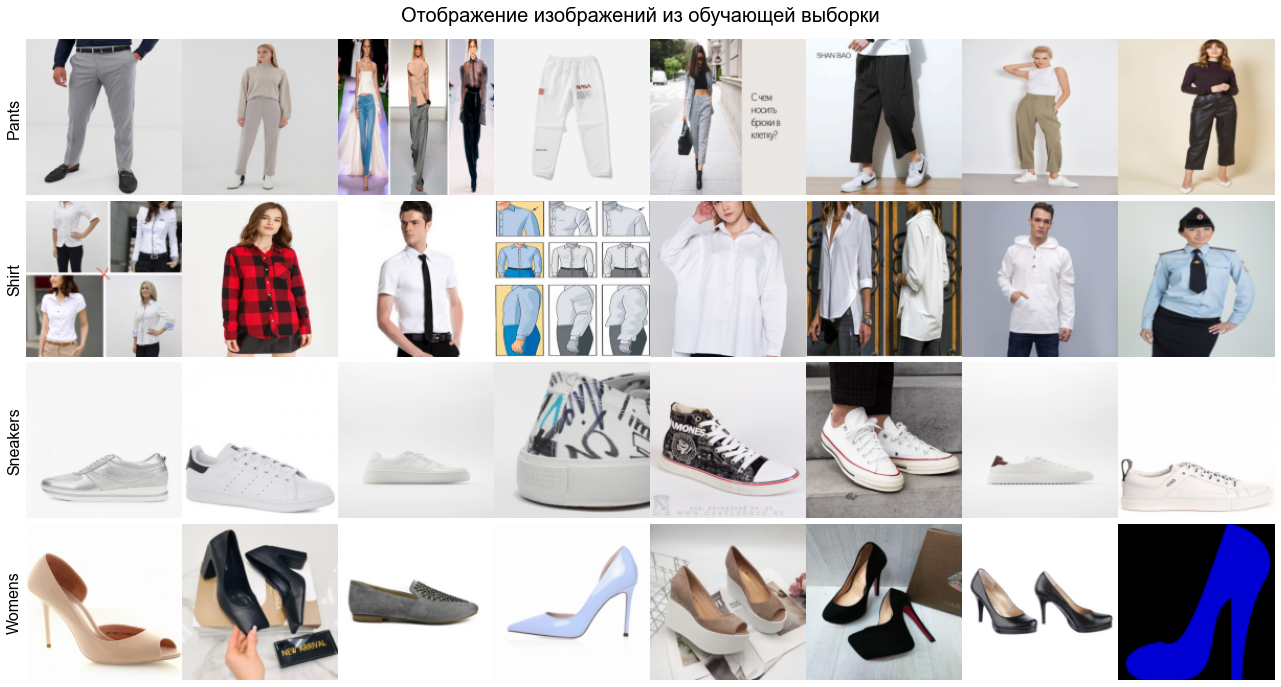

In [22]:
resize_img = (150, 150, 3) # Размер изображения

nrows = len(dict_dep.index) # Количество строк
ncols = 8 # Количество столбцов

samples = ncols # Количество примеров

fig = plt.gcf() # Создание фигуры
fig.set_size_inches(ncols * 2.2, nrows * 2.25) # Установка размера фигуры в дюймах

mpl.rcParams['axes.linewidth'] = 0 # Толщина рамки

idx_show = [] # Метки которые уже были показаны

i = 0 # Счетчик

for curr in dict_dep.index.tolist():
    # Случайная выборка
    idx_show = data.where(data.variable == curr).dropna().sample(n = samples)
    
    for var, val in zip(idx_show.variable, idx_show.value):        
        sp = plt.subplot(nrows, ncols, i + 1)
        
        # Скрытие осей
        plt.setp(sp.get_xticklabels(), visible = False)
        plt.setp(sp.get_yticklabels(), visible = False)
        plt.xticks([])
        plt.yticks([])

        path_to_img = os.path.join(base_dir, curr, val)

        img = mpimg.imread(path_to_img)

        # Уменьшение изображения
        img_small = transform.resize(img, resize_img)

        plt.imshow(img_small)
        
        if i % samples == 0:
            label = var.split('_') # Метка
            
            sp.set_ylabel(
                label[0],
                fontsize = 16, # Размер метки
                fontdict = {
                    'color': '#000000' # Цвет метки
                },
                labelpad = 4 # Отступ
            )
        
        i += 1

plt.suptitle(
    'Отображение изображений из обучающей выборки', # Заголовок
    fontsize = 20, # Размер заголовка
    fontdict = {
        'color': '#000000' # Цвет заголовка
    },
    y = 1.045 # Отступ заголовка от вершины осей
)

plt.tight_layout(pad = 0) # Установка расстояния между осями

plt.show() # Отображение фигуры

---

### Pycharm + Jupyter

> см. https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html

<h4 align="center">
    <img width="1000px" src="https://raw.githubusercontent.com/DmitryRyumin/Automated_Data_Processing_and_Control_Systems/master/Lectures/PyCharm.png" alt="PyCharm" />
</h4>